In [1]:
# First we load our location data and drop any duplicated places within documents
import pandas as pd
df = pd.read_feather("data/included_studies.feather")
df.head()

,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,4 - 2.04. Extreme event attribution,4 - 2.05. Scenarios,5 - 4.01. Floods and drought,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity
0,W2021823358,Projections of heat waves with high impact on ...,"Climate change will result in more intense, mo...",2014.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W2345489509,Climate Change and the Emergent Epidemic of CK...,Climate change has led to significant rise of ...,2016.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W2093213412,Children are likely to suffer most from our fo...,BACKGROUND: The periods of fetal and child dev...,2008.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
pd.read_csv('data/grid_df.csv')[['LAT','LON','index']]

,LAT,LON,index
0,-88.75,-178.75,0
1,-88.75,-176.25,1
2,-88.75,-173.75,2
3,-88.75,-171.25,3
4,-88.75,-168.75,4
...,...,...,...
10363,88.75,168.75,10363
10364,88.75,171.25,10364
10365,88.75,173.75,10365
10366,88.75,176.25,10366


In [15]:
# Then we simplify the attribution categories

grid_df = pd.read_csv('data/dynamic_grid_df.csv')
#grid_df = pd.read_csv('data/grid_df.csv')
for orig_var in ["temp_da", "precip_da","temp_da_dynamic"]:
    if orig_var not in grid_df.columns:
        continue
    simp_var = f"{orig_var}_simplified"
    grid_df[simp_var] = grid_df[orig_var]
    grid_df.loc[grid_df[orig_var].isin([2,3]), simp_var] = 1
    grid_df.loc[grid_df[orig_var].isin([-2,-3]), simp_var] = -1
    grid_df.loc[grid_df[orig_var].isin([-4, 4]), simp_var] = 0
grid_df.head()

,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,temp_da,population,temp_da_simplified,precip_da_simplified,temp_da_dynamic_simplified
0,87.5,-177.5,0.0,1990,10080,86.25,-178.75,5053.753306,False,NaN,NaN,0.0,NaN,NaN,0.0
1,87.5,-177.5,0.0,1990,10081,86.25,-176.25,5053.753306,False,NaN,NaN,0.0,NaN,NaN,0.0
2,87.5,-177.5,0.0,1990,10224,88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,0.0
3,87.5,-177.5,0.0,1990,10225,88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,0.0
4,87.5,-172.5,0.0,1990,10082,86.25,-173.75,5053.753306,False,NaN,NaN,0.0,NaN,NaN,0.0


In [4]:
grid_df['year'].max()

2023

In [6]:
df['attr_year'] = df['publication_year'] - 1

In [11]:
# Now we load the grid-doc matches

shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(
    grid_df[["index","area","population","precip_da_simplified","temp_da_simplified"]], left_on="grid_df_id", right_on="index"
)
shp_df_matches

/tmp/ipykernel_58365/4064691755.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(


,grid_df_id,doc_id,shp_id,place,index,area,population,precip_da_simplified,temp_da_simplified
0,6281,5249722,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
1,6281,5110789,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
2,6281,3927578,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
3,6281,3313720,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
4,6281,W2291458255,1710.0,'asir region,6281,73170.065846,3306124.80,NaN,1.0
...,...,...,...,...,...,...,...,...,...
5136413,7852,W2182955483,NaN,teatro scientifico del bibiena,7852,53433.779588,6104070.00,0.0,1.0
5136414,3969,W2119670518,NaN,makgadikgadi pans,3969,72017.010590,114366.39,NaN,NaN
5136415,7531,W2102577708,NaN,what cherr farm (historical),7531,58095.277049,4591156.50,0.0,1.0
5136416,8280,W2013719334,NaN,the broads,8280,45690.980314,2294677.80,0.0,1.0


In [16]:
# Now we load the grid-doc matches

shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(
    df[['id','attr_year']].rename(columns={'id':'doc_id'})
).merge(
    grid_df[["index","area","population","precip_da_simplified","temp_da_simplified","temp_da_dynamic_simplified","year"]], left_on=["grid_df_id",'attr_year'], right_on=["index",'year']
)
shp_df_matches

/tmp/ipykernel_58365/3766167692.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(


,grid_df_id,doc_id,shp_id,place,attr_year,index,area,population,precip_da_simplified,temp_da_simplified,temp_da_dynamic_simplified,year
0,6281,W2291458255,1710.0,'asir region,2007.0,6281,73170.065846,3306124.80,NaN,1.0,1.0,2007
1,6281,W2223796613,1710.0,'asir region,2014.0,6281,73170.065846,3306124.80,NaN,1.0,1.0,2014
2,6281,W1531434374,1710.0,'asir region,2010.0,6281,73170.065846,3306124.80,NaN,1.0,1.0,2010
3,5547,W3121154669,4317.0,abia state,2019.0,5547,76811.546551,27020884.00,NaN,1.0,1.0,2019
4,5547,W2896162841,4317.0,abia state,2017.0,5547,76811.546551,27020884.00,NaN,1.0,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1669900,7093,W2464419816,NaN,coosa river,1995.0,7093,64248.337217,4563782.00,0.0,0.0,0.0,1995
1669901,7852,W2182955483,NaN,teatro scientifico del bibiena,2008.0,7852,53433.779588,6104070.00,0.0,1.0,1.0,2008
1669902,3969,W2119670518,NaN,makgadikgadi pans,2009.0,3969,72017.010590,114366.39,NaN,NaN,0.0,2009
1669903,7531,W2102577708,NaN,what cherr farm (historical),2007.0,7531,58095.277049,4591156.50,0.0,1.0,1.0,2007


In [17]:
df = df[df["id"].isin(shp_df_matches["doc_id"])].reset_index(drop=True)

In [27]:
def agg_da(data, x):
    total_area = data["area"].sum()
    attrib_area = data[data[x].isin([-1,1])]["area"].sum()
    return attrib_area / total_area


attrib_vars = ["temp_da_simplified","precip_da_simplified"]
attrib_vars = ["temp_da_dynamic_simplified","precip_da_simplified"]
attrib_drivers = ["2 - 1.02. Changes in temperature","2 - 1.04. Changes in precipitation"]
for i, driver in enumerate(attrib_drivers):
    driver_studies = df[df[driver]>=0.5]
    sub_shp = shp_df_matches[shp_df_matches["doc_id"].isin(driver_studies["id"])]
    var = attrib_vars[i]
    attrib = sub_shp.groupby("doc_id").apply(agg_da, var)
    attrib = attrib.to_frame(var).reset_index().rename(columns={"doc_id":"id"})
    if var not in df.columns:
        df = df.merge(attrib, how="outer").fillna(0)
df["attributable"] = df[attrib_vars].max(axis=1)
df.to_feather("data/attributable_df.feather")
df.head()


/tmp/ipykernel_58365/1279079525.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attrib = sub_shp.groupby("doc_id").apply(agg_da, var)
/tmp/ipykernel_58365/1279079525.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attrib = sub_shp.groupby("doc_id").apply(agg_da, var)


,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity,attr_year,temp_da_dynamic_simplified,precip_da_simplified,attributable
0,W100193498,Climate change and farmers' adaptation,The objectives of this research are (1) to des...,2011.0,0.992775,0.984798,0.013960,0.959774,0.031273,0.003226,...,0.024681,0.024685,0.024349,0.025981,0.082759,0.833953,2010.0,1.000000,0.000000,1.000000
1,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.007820,0.002153,...,0.024910,0.035580,0.046913,0.010683,0.013760,0.025168,2003.0,0.783536,0.000000,0.783536
2,W1004004788,Environment and Human Health in the Anthropoce...,"Coastal Tanzania, a region of historical and g...",2015.0,0.997004,0.981595,0.022610,0.931149,0.848387,0.012694,...,0.007305,0.009798,0.006499,0.015625,0.011764,0.013544,2014.0,0.904633,0.003643,0.904633
3,W100405080,ECOLOGICAL SOURCES AND TRANSMISSION CYCLES OF ...,The transmission of Campylobacter from its var...,2010.0,0.997135,0.994380,0.013344,0.990513,0.012740,0.974882,...,0.008761,0.009493,0.007207,0.013482,0.013739,0.017310,2009.0,0.203069,0.126534,0.203069
4,W1005083909,The Relations of Climate and Land Use with the...,The objective of this study was to determine t...,2015.0,0.997090,0.988201,0.013064,0.988614,0.007817,0.982436,...,0.009213,0.008087,0.006932,0.016273,0.015863,0.015024,2014.0,1.000000,0.000000,1.000000


In [28]:
import re
import numpy as np
clim = [x for x in df.columns if re.match("2 -",x)]
health = [x for x in df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    for j, h in enumerate(health):
        n = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ].shape[0]
        cn = df[df[c]>=0.5].shape[0]
        hn = df[df[h]>=0.5].shape[0]
        mat[i,j] = n
        links.append({"source":i,"target":len(clim)+j,"n":n})
        data.append([
            n,
            f"{c.split('.')[2]} ({cn})",
            f"{h.split('.')[2]} ({hn})",
        ])

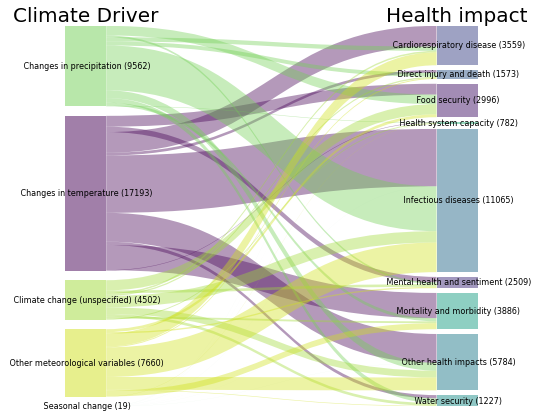

In [29]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8)

In [21]:
c = '2 - 1.02. Changes in temperature'
attrib_dict = dict(zip(attrib_drivers, attrib_vars))
attrib_dict

{'2 - 1.02. Changes in temperature': 'temp_da_dynamic_simplified',
 '2 - 1.04. Changes in precipitation': 'precip_da_simplified'}

In [30]:
import re
import numpy as np
clim = [x for x in df.columns if re.match("2 -",x)]
health = [x for x in df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                f"{c.split('.')[2]} ({cn})",
                "Not attributable",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                f"{c.split('.')[2]} ({cn})",
                "NA",
                f"{h.split('.')[2]} ({hn})",
            ])            


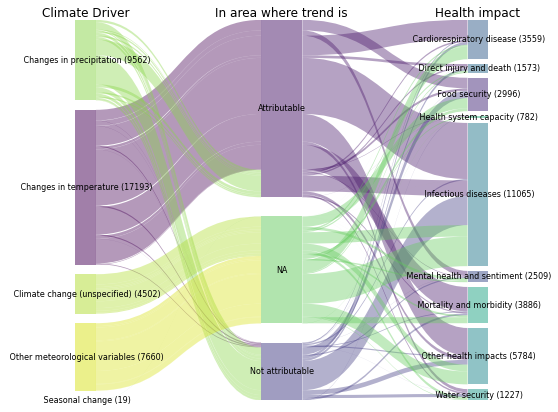

In [23]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver","In area where trend is", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)

In [24]:
df

,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity,attr_year,temp_da_dynamic_simplified,precip_da_simplified,attributable
0,W100193498,Climate change and farmers' adaptation,The objectives of this research are (1) to des...,2011.0,0.992775,0.984798,0.013960,0.959774,0.031273,0.003226,...,0.024681,0.024685,0.024349,0.025981,0.082759,0.833953,2010.0,1.000000,0.000000,1.000000
1,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.007820,0.002153,...,0.024910,0.035580,0.046913,0.010683,0.013760,0.025168,2003.0,0.783536,0.000000,0.783536
2,W1004004788,Environment and Human Health in the Anthropoce...,"Coastal Tanzania, a region of historical and g...",2015.0,0.997004,0.981595,0.022610,0.931149,0.848387,0.012694,...,0.007305,0.009798,0.006499,0.015625,0.011764,0.013544,2014.0,0.904633,0.003643,0.904633
3,W100405080,ECOLOGICAL SOURCES AND TRANSMISSION CYCLES OF ...,The transmission of Campylobacter from its var...,2010.0,0.997135,0.994380,0.013344,0.990513,0.012740,0.974882,...,0.008761,0.009493,0.007207,0.013482,0.013739,0.017310,2009.0,0.203069,0.126534,0.203069
4,W1005083909,The Relations of Climate and Land Use with the...,The objective of this study was to determine t...,2015.0,0.997090,0.988201,0.013064,0.988614,0.007817,0.982436,...,0.009213,0.008087,0.006932,0.016273,0.015863,0.015024,2014.0,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30415,W762448766,HUBUNGAN FAKTOR RISIKO LINGKUNGAN TERHADAP KEJ...,Trend of cases pneumonia in children under fiv...,2015.0,0.989150,0.994390,0.016933,0.026350,0.007763,0.992592,...,0.008565,0.008838,0.006810,0.023737,0.015944,0.020732,2014.0,0.544531,0.000000,0.544531
30416,W762745303,Emergency Department Presentations following T...,Emergency departments see an increase in cases...,2015.0,0.993452,0.007928,0.096003,0.006867,0.014129,0.016054,...,0.029861,0.961781,0.032345,0.015349,0.016420,0.014584,2014.0,0.000000,0.000000,0.000000
30417,W767163874,"Investigation of pharmaceuticals, personal car...",Previous studies showed the presence of multip...,2015.0,0.992856,0.019621,0.020197,0.993103,0.009617,0.495174,...,0.007825,0.010606,0.006811,0.180001,0.098000,0.054979,2014.0,0.000000,0.000000,0.000000
30418,W7684504,Weather Effects on Daily Traffic Accidents and...,The impact of weather conditions on traffic sa...,2010.0,0.995471,0.957871,0.026408,0.996116,0.021670,0.011050,...,0.007291,0.009729,0.007653,0.019361,0.013893,0.013020,2009.0,0.490845,0.000000,0.490845


In [25]:
import re
import numpy as np
clim = [x for x in df.columns if re.match("2 -",x)]
health = [x for x in df.columns if re.match("3 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                "Human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                "Not demonstrably human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                "NA",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])      

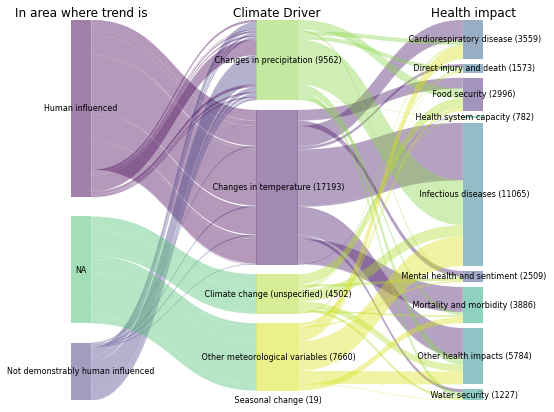

In [26]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "In area where trend is", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)
plt.savefig("figures/sankey.pdf", bbox_inches="tight")

In [14]:
import re
import numpy as np
clim = [x for x in df.columns if re.match("2 -",x) or re.match("5 -",x)]
health = [x for x in df.columns if re.match("3 -",x) or re.match("6 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []
for i, c in enumerate(clim):
    cn = df[df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = df[df[h]>=0.5].shape[0]
        chdf = df[
            (df[c]>=0.5) &
            (df[h]>=0.5)
        ]
        if c in attrib_drivers:
            n = chdf[chdf[attrib_dict[c]]>=0.1].shape[0]
            data.append([
                n,
                "Human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
            n = chdf[chdf[attrib_dict[c]]<0.1].shape[0]
            data.append([
                n,
                "Not demonstrably human influenced",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])
        else:
            data.append([
                chdf.shape[0],
                "NA",
                f"{c.split('.')[2]} ({cn})",
                f"{h.split('.')[2]} ({hn})",
            ])      

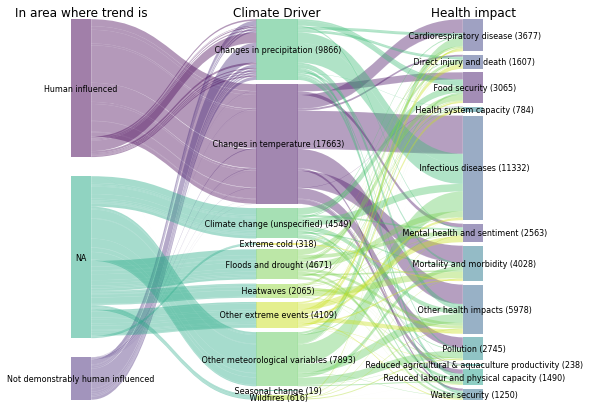

In [15]:
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "In area where trend is", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)

In [16]:
df.shape

(31254, 35)

In [17]:
attrib_types = [x for x in df.columns if re.match("^4 -",x)]
df[attrib_types].round().sum() / df.shape[0]

4 - 2.01. Climate change attribution    0.127088
4 - 2.02. Trend attribution             0.000256
4 - 2.03. Climate sensitivity           0.621009
4 - 2.04. Extreme event attribution     0.292923
4 - 2.05. Scenarios                     0.019390
dtype: float64

In [18]:
(df[attrib_drivers].max(axis=1) > 0.5).sum()

21508

In [19]:
(df["attributable"]>0.5).sum() / df.shape[0]

0.5345875727906828

In [20]:
(df["attributable"]>0.5).sum()

16708

In [21]:
(df['3 - 2.05. Infectious diseases']>0.5).sum() / df.shape[0]

0.36257759006847123

In [22]:
(df['3 - 2.03. Cardiorespiratory disease']>0.5).sum() / df.shape[0]

0.11764894093556025

In [23]:
(df['3 - 2.08. Mortality and morbidity']>0.5).sum() / df.shape[0]

0.12887950342356178

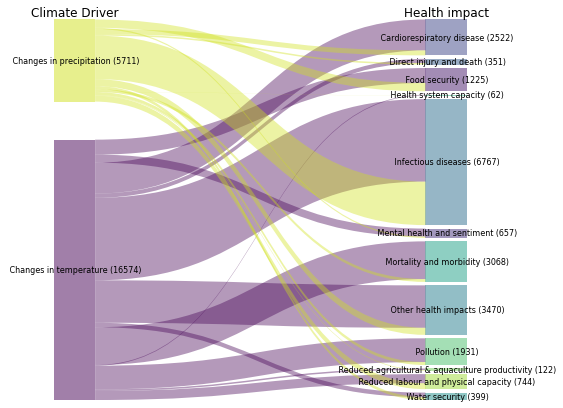

In [24]:
import re
import numpy as np
clim = [x for x in df.columns if re.match("2 -",x) or re.match("5 -",x)]
health = [x for x in df.columns if re.match("3 -",x) or re.match("6 -",x)]
links = []
mat = np.zeros((len(clim),len(health)))
data = []

attrib_df = df[df["attributable"]>0.5]

for i, c in enumerate(attrib_drivers):
    cn = attrib_df[attrib_df[c]>=0.5].shape[0]
    for j, h in enumerate(health):
        hn = attrib_df[attrib_df[h]>=0.5].shape[0]
        chdf = attrib_df[
            (attrib_df[c]>=0.5) &
            (attrib_df[h]>=0.5)
        ]       
        data.append([
            chdf.shape[0],
            f"{c.split('.')[2]} ({cn})",
            f"{h.split('.')[2]} ({hn})",
        ])      
            
from mpl_sankey import sankey
import matplotlib.pyplot as plt
sdf = pd.DataFrame(data, columns=["Weight", "Climate Driver", "Health impact"])
plt.figure(figsize=(7.4, 7))
sankey(sdf, cmap=plt.get_cmap('viridis'),labels_size=8, titles_size=12)

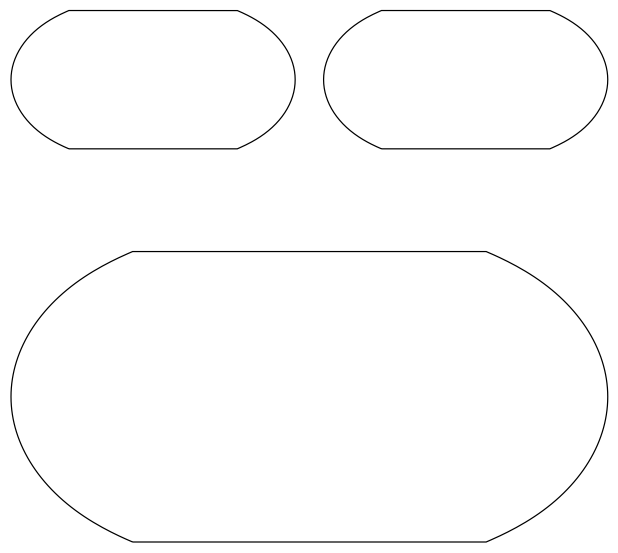

In [36]:
import cartopy.crs as ccrs

p = ccrs.EqualEarth()

fig = plt.figure(figsize=(7,7), dpi=110)
gs = fig.add_gridspec(2, 2, figure=fig, wspace=0.1, height_ratios=[1,2])

ax = plt.subplot(gs[0,0], projection=p)



ax = plt.subplot(gs[0,1], projection=p)
ax = plt.subplot(gs[1,:], projection=p)

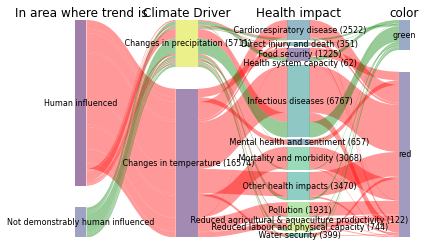

In [49]:
import numpy as np
import pandas as pd

import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib.path import Path

from matplotlib.collections import PatchCollection


# Share of total width left empty (same in each phase):
GAPS = .1

# Location of bounds (if a phase is drawn from 0 to 1).
LEFT = .1
RIGHT = .9

def _draw_flow(start, end, width, left, right, color):
    """
    Draw a single flow, from "left" to "right", with y going from "start" to
    "end", width "width" and color "color".
    """
    space = right - left

    verts = np.zeros(shape=(9, 2), dtype='float')
    verts[:,1] = start
    verts[2:6,1] = end
    verts[4:,1] += width

    verts[:,0] = left
    verts[1:7,0] += space / 2
    verts[3:5,0] += space / 2

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY
             ]

    path = Path(verts, codes)

    patch = patches.PathPatch(path, facecolor=color, lw=0, alpha=.4)
    plt.gca().add_patch(patch)


def _node_text(start, size, node_sizes):
    if node_sizes is True:
        node_sizes = '{label} ({size})'
    # Allow for formatting specs:
    elif '{label' not in node_sizes:
        size = node_sizes.format(size)
        node_sizes = '{label} {size}'
    return node_sizes.format(label=start, size=size)

def alt_sankey(data, cmap=plt.get_cmap('jet_r'), color_column=None, flows_color=None,
           labels_color='black', titles_color='black', labels_size=20,
           titles_size=20, node_sizes=False, sort_flows_by_nodes=False):
    """
    Draw a sankey diagram.

    Parameters
    ----------

    data : pandas DataFrame, numpy 2-D array, or list of equal length lists
        The data to be represented. Each row describes a flow from the
        beginning to the end. The first column must be numeric and represents
        the (positive) width of the flow. Each other column describes the label
        of the flow at a given stage.
        At least two stages (start, end) are needed to produce a meaningful
        diagram, hence "data" needs to hold three or more columns.

    cmap : colormap, default: 'jet_r'
        Used to assign a color to each block (and to its outgoing flows, unless
        the "flows_color" argument is used).

    flows_color : color, default: None
        Draw all flows of a same color, rather than of the color of each flow's
        starting block.

    labels_color : color or None, default: 'black'
        Color to be used for labels, None to hide them.

    titles_color : color or None, default: 'black'
        Color to be used for titles, None to hide them.

    labels_size : int, default: 20
        Font size for node labels.

    titles_size : int, default: 20
        Font size for titles.

    node_sizes : Boolean or string, default: False
        Whether to show node sizes close to node labels.
        A format string with named placeholders can be passed to control the
        formatting, as in '{label}\n({size}\%)': if only a non-named
        placeholder is present, as in '- {}', the label is prepended separated
        by a space.
        Passing True is equivalent to passing '{label} ({size})' (or '({})').

    sort_flows_by_nodes : Boolean, default: False
        Whether flows from/to a given node should be sorted based on the
        position of the starting and ending nodes - the default is to sort them
        based on their position in the passed data.
    """

    data = pd.DataFrame(data)

    # One column is for the weights, the remaining n+1 limits define n phases:
    phases = data.shape[1] - 2


    all_labels = data.iloc[:, 1:].stack().unique()

    colors = dict(zip(all_labels,
                      cmap(np.arange(0, len(all_labels))/len(all_labels))))

    # Actual scale from flow/block width to drawn width:
    factor = (1 - GAPS) / data.iloc[:, 0].sum()

    # The first column always contains weights:
    var_weight = data.columns[0]
    for phase in range(phases):
        # ... while the columns containing variables shift at each phase:
        var_left = data.columns[phase+1]
        var_right = data.columns[phase+2]

        # Compute total weight for each label:
        l_sizes = data.groupby(var_left)[var_weight].sum()
        r_sizes = data.groupby(var_right)[var_weight].sum()

        # Drop empty cats (https://github.com/pandas-dev/pandas/issues/8559):
        l_sizes, r_sizes = (s.pipe(lambda x : x[x>0]) for s in (l_sizes, r_sizes))

        # Map weights to drawn sizes:
        l_shares = l_sizes * factor
        r_shares = r_sizes * factor

        # Distribute gap space among gaps:
        l_gaps = GAPS / max((len(l_shares) - 1), 1)
        r_gaps = GAPS / max((len(r_shares) - 1), 1)

        # Compute blocks positions, including gaps:
        l_starts = (l_shares + l_gaps).cumsum().shift().fillna(0)
        r_starts = (r_shares + r_gaps).cumsum().shift().fillna(0)

        for (pos, l, w, starts, shares) in (
                           ('right', phase+RIGHT, 1-RIGHT, r_starts, r_shares),
                           ('left', phase, LEFT, l_starts, l_shares)):
            if pos == 'right' and phase < phases - 1:
                # Center text for full width:
                text_x = l + w
            elif pos == 'left' and phase:
                # Do not draw text - it will be drawn by next phase:
                text_x = -1
            else:
                # Center text for half width (first or last extreme):
                text_x = l + 0.5*w

            for idx, start in enumerate(starts.index):
                # Draw blocks:
                bottom = starts.loc[start]
                p = patches.Rectangle((l, 1 - bottom - shares.loc[start]),
                                      w, shares.loc[start],
                                      fill=False, clip_on=False)
                pc = PatchCollection([p], facecolor=colors[start], alpha=.5)
                plt.gca().add_collection(pc)

                # Draw labels text:
                if text_x != -1 and labels_color is not None:
                    if node_sizes is not False:
                        if phase == 0 and pos == 'left':
                            size = l_sizes.iloc[idx]
                        else:
                            size = r_sizes.iloc[idx]
                        text = _node_text(start, size, node_sizes)
                    else:
                        text = f"{start}"

                    plt.gca().text(text_x,
                                   1 - bottom - 0.5 * shares.loc[start],
                                   text,
                                   horizontalalignment='center',
                                   verticalalignment='center',
                                   fontsize=labels_size, color=labels_color)

            # Draw titles:
            if text_x != -1 and titles_color is not None:
                plt.gca().text(text_x,
                               1,
                               var_left if pos == 'left' else var_right,
                               horizontalalignment='center',
                               verticalalignment='bottom',
                               fontsize=titles_size, color=titles_color)

        # Draw flows:
        flows_list = data[[var_weight,
                           var_left,
                           var_right, color_column]]
        if sort_flows_by_nodes:
            # Avoid (probably unjustified - we're working on entire columns)
            # SettingWithCopyWarning:
            flows_list = flows_list.copy()
            for a_var, starts in (var_left, l_starts), (var_right, r_starts):
                dtype = pd.CategoricalDtype(categories=starts.index,
                                            ordered=True)
                flows_list[a_var] = flows_list[a_var].astype(dtype)
            flows_list = flows_list.sort_values([var_left, var_right])

        for idx, (weight, start, end, color) in flows_list.iterrows():
            width = weight * factor
            l = l_starts.loc[start]
            r = r_starts.loc[end]
            _draw_flow(1 - l_starts.loc[start] - width,
                       1 - r_starts.loc[end] - width, width,
                       phase + LEFT, phase + RIGHT,
                       color or colors[start])
            l_starts.loc[start] += width
            r_starts.loc[end] += width

    plt.xlim(0, phases)
    plt.axis('off')

sdf["color"] = np.where(sdf["In area where trend is"]=="Human influenced","red","green")
sankey(sdf, cmap=plt.get_cmap('viridis'), color_column="color", labels_size=8, titles_size=12)